In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("data.csv")

In [7]:
df

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New
0,930,220,47,2,2,1,1,0,0,0,0
1,1000,148,45,2,2,1,1,0,0,0,0
2,1000,100,48,2,2,1,1,0,0,0,0
3,1000,200,48,2,2,1,1,0,0,0,0
4,1300,410,55,2,2,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5759,3900,850,48,1,2,1,1,0,1,1,0
5760,4500,750,68,2,2,1,1,0,0,1,0
5761,3000,610,51,1,1,0,1,0,1,1,0
5762,3700,595,73,1,2,1,1,0,0,1,0


## **Split Dataset**

In [8]:
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'sklearn'

In [30]:
y = df["Price"]
x = df.loc[: , df.columns != "Price"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

## **Linear Regression**

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model = LinearRegression()
model.fit(X_train, y_train) # ajusta o modelo usando o Mínimos Quadrados Ordinários (OLS)

LinearRegression()

In [34]:
features = X_train.iloc[:10] # amostra
labels = y_train.iloc[:10]

print(model.predict(features))
print(labels.values)

[1512.79850239 1888.69768572 2723.44588512 1927.0550305  3432.31071473
 4096.20925685 3179.23332945 2315.0729364  2268.42015728 1540.93628594]
[1660 2890 1800 1000 3000 6000 2500 1450 1550 1800]


In [35]:
predit = model.predict(X_train) # aplica a equação da regressão linear com os coeficientes ajustados

In [36]:
coef = model.coef_
intercept = model.intercept_
print("Coeficiente:", coef) # retorna o numero de vars independente usadas
print("Intercepto:", intercept) # o intercepto é o valor estimado quando todas as variáveis independentes são zero (abstrato)

Coeficiente: [ 3.22011482e-01  1.30632950e+01 -1.93727110e+02  1.98531887e+02
 -5.73932034e+01  1.66183838e+02 -1.22893567e+01  6.44087672e+02
  3.67858166e+02 -1.39709273e+02]
Intercepto: 624.9011610000025


### 1. Mean-absolute-error

Basicamente retorna a média dos erros (custo) absoluto entre valor real com o valor predito.

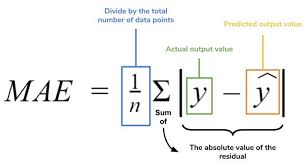

In [37]:
from sklearn.metrics import mean_absolute_error 

In [38]:
mae = mean_absolute_error(y_train, predit)

In [39]:
print(mae)

630.8108697927222


### 2. Root Mean Squared Error

Retorna a raiz quadrada da médio dos erros ao quadrado, penaliza outliers.

<img src="https://editor.analyticsvidhya.com/uploads/56967RMSE.png" alt="Descrição da Imagem" style="width:400px;"/>

In [40]:
from sklearn.metrics import root_mean_squared_error 

In [41]:
rmse = root_mean_squared_error(y_train, predit)

In [42]:
rmse

873.9412860238608

### 2. Cross-Validation: rmse

Usamos cross para dividir nossos dados de treinos em subconjuntos e medir a capacidade de generalização do modelo para conjuntos

<img src="https://miro.medium.com/v2/resize:fit:792/1*yBTCy2j8VNzY8YumvlBUug.png" alt="Descrição da Imagem" style="width:400px;"/>

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
scores_fold_rmse = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [45]:
score_rmse = np.sqrt(-scores_fold_rmse)

In [46]:
def summary(socore):
    print(socore)
    print(socore.mean())

In [47]:
summary(score_rmse)

[954.70104324 840.24248563 821.11947104 842.95659634 920.07367347]
875.8186539446613


### 2. Cross-Validation: mae

In [48]:
scores_fold_mae = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

In [49]:
scores_fold_mae = -scores_fold_mae

In [50]:
summary(scores_fold_mae)

[673.3429969  601.31163309 604.79248339 602.33203303 683.94298377]
633.1444260348644
